## Setup
**Linear Discriminant Analysis**

You will implement dimensionality reduction with LDA.  

1). Read iris_dataset.csv (4 features, hence 4 PCs) and remove the first class

2). Find the LDA components

3). Recontruct the dataset (X_hat)

4). Determine the accuracy of X_hat for 1-4 PCs using a LBF SVM classifier (provided)


In [27]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.svm import SVC # This package will help you run the SVM model directly
from sklearn.metrics import accuracy_score # Use accruacy_score to find out accuracy of your model
from sklearn.model_selection import train_test_split

# Load data - 150 observations, 4 features, 3 classes
df = pd.read_csv("iris_dataset.csv", header=None)
data = df.values

# Remove the first class and change the class index
X_raw = data[50:,0:4]               # From 150 to 100 samples
y = (np.rint(np.subtract(data[50:,4],2))).astype(int) # From class 2/3 to class 0/1

SVM classifier (with 20% of the data as the test sets)

In [28]:
def svm_accuracy(X_hat, y, num_pc):
    X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2)

    clf = SVC(kernel='linear') # Use the linear function of the SVM algorithm
    clf.fit(X_train,y_train) # Train the model using the x_train and y_train
    y_pred = clf.predict(X_test) # Run prediction after training on the testing dataset
    acc = accuracy_score(y_test,y_pred)
    print(num_pc, acc)
    return acc # Print your final accuracy

LDA (Your code goes here)

In [29]:
# 2-class LDA
def LDA(X, y, Num_PC):
    # Note that the matrix X in the program is transpose of that in the slides
    # Note that eigenvectors in the program is transpose of those in the slides
    # Setup
    dim = len(X[0])
    sum = np.zeros((2,dim))
    means = np.zeros((2,dim))
    count = np.zeros(2)
    Sw = np.zeros((dim,dim))
    
    # To-Do
    # First, compute class means
    class_labels = np.unique(y)
    for i in range(len(X)):
        sum[y[i]] += X[i]
        count[y[i]] += 1
    means = sum / count[:, np.newaxis]
    # Second, compute within-class scatter matrix (Sw)
    for i in range(len(X)):
        xi = X[i].reshape(-1, 1)
        mean_vec = means[y[i]].reshape(-1, 1)
        Sw += (xi - mean_vec).dot((xi - mean_vec).T)
    # Third, compute between-class scatter matrix (Sb)
    overall_mean = np.mean(X, axis=0).reshape(-1, 1)
    Sb = np.zeros((dim, dim))
    for i in range(len(class_labels)):
        n = count[i]
        mean_vec = means[i].reshape(-1, 1)
        Sb += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    # Fourth, compute Fisher's criterion matrix using LA.pinv() to invert Sw
    Sw_inv = LA.pinv(Sw)
    Fisher_criterion = Sw_inv.dot(Sb)
    # Fifth, compute the eigenvalues & eigenvectors of Fisher's criterion matrix
    eigen_values, eigen_vectors = np.linalg.eig(Fisher_criterion)
    # Sixth, sort the eigenvalues & eigenvectors in descending order
    sorted_indices = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[sorted_indices]
    eigen_vectors = eigen_vectors[:, sorted_indices]
    # Seventh, transform the data by selecting the first Num_PC eigenvectors to achieve the desired dimension of our final reduced data.
    W = eigen_vectors[:, :Num_PC]
    X_reduced = X.dot(W)
    return X_reduced

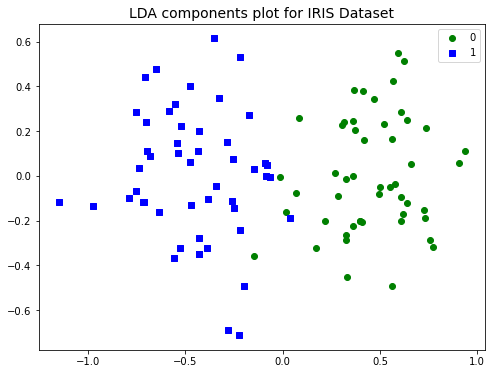

1 1.0
1 1.0
1 0.95
1 1.0
1 0.95
1 1.0
1 0.95
1 0.95
1 1.0
1 0.85
Value:  [1.0, 1.0, 0.95, 1.0, 0.95, 1.0, 0.95, 0.95, 1.0, 0.85]
average accuracy:  0.9650000000000001
2 1.0
2 1.0
2 1.0
2 1.0
2 0.95
2 0.95
2 0.95
2 0.9
2 0.9
2 0.95
Value:  [1.0, 1.0, 1.0, 1.0, 0.95, 0.95, 0.95, 0.9, 0.9, 0.95]
average accuracy:  0.96
3 1.0
3 1.0
3 0.95
3 0.9
3 1.0
3 0.95
3 0.95
3 1.0
3 1.0
3 1.0
Value:  [1.0, 1.0, 0.95, 0.9, 1.0, 0.95, 0.95, 1.0, 1.0, 1.0]
average accuracy:  0.975
4 1.0
4 1.0
4 0.95
4 1.0
4 0.95
4 0.95
4 0.95
4 1.0
4 0.95
4 1.0
Value:  [1.0, 1.0, 0.95, 1.0, 0.95, 0.95, 0.95, 1.0, 0.95, 1.0]
average accuracy:  0.975


In [30]:
# Perform zero means
u = [np.mean(X_raw[:,0]), np.mean(X_raw[:,1]), np.mean(X_raw[:,2]), np.mean(X_raw[:,3])]
XM = np.subtract(X_raw,u)  # Subtracting the mean from each feature

# Visualize the dataset with the projection to 2 principal components
X_lda = LDA(XM, y, 2)  # Applying LDA with 2 components

plt.figure(figsize=(8,6))

# Scatter plot for class 0
plt.scatter(X_lda[0:50,0], X_lda[0:50,1], color='green', marker='o', label='0')

# Scatter plot for class 1
plt.scatter(X_lda[50:100,0], X_lda[50:100,1], color='blue', marker='s', label='1')

plt.title("LDA components plot for IRIS Dataset", fontsize=14)
plt.legend()
plt.show()

# Measuring the accuracy vs. the number of components
for i in range(4):
  acc_list = []
  num_pc = i+1
  X_hat = LDA(XM, y, num_pc) # Applying PCA with the current number of components
  for r in range(10):
    # Call the function evaluate_accuracy
    accuracy = svm_accuracy(X_hat, y, num_pc)  # classification accuracy with 1-4 PC
    acc_list.append(accuracy) 
  average_acc = np.mean(acc_list)
  print('Value: ', acc_list)
  print('average accuracy: ', average_acc)